In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
co2_df = pd.read_csv("dataset/GCB2022v27_MtCO2_flat.csv")
ukrn_df = pd.read_csv("dataset/uk_renewable_energy.csv")

In [3]:
uk_data = co2_df[co2_df['Country'] == 'United Kingdom']

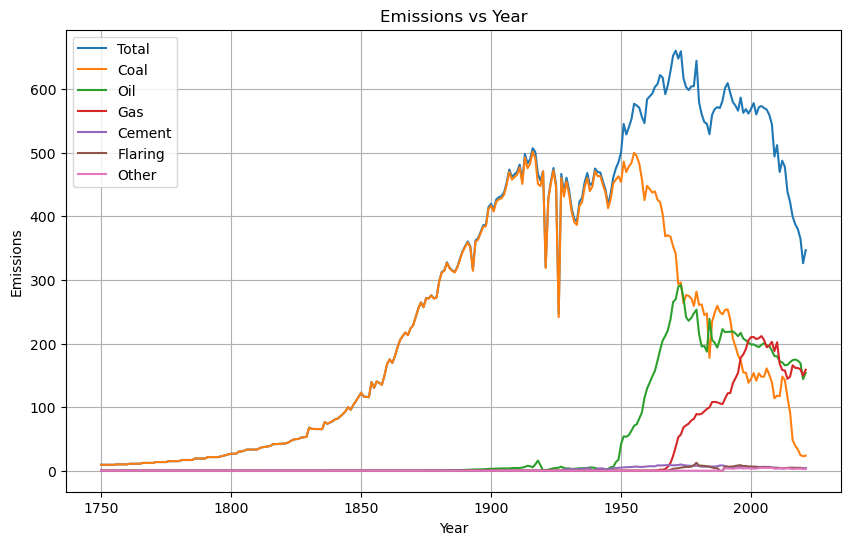

In [4]:
# Extract the columns of interest
columns_of_interest = ['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
data_of_interest = uk_data[columns_of_interest].fillna(0)

# Set the 'Year' column as the index
data_of_interest.set_index('Year', inplace=True)

# Plot the data
data_of_interest.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions vs Year')
plt.grid(True)
plt.legend(loc='best')
plt.show()

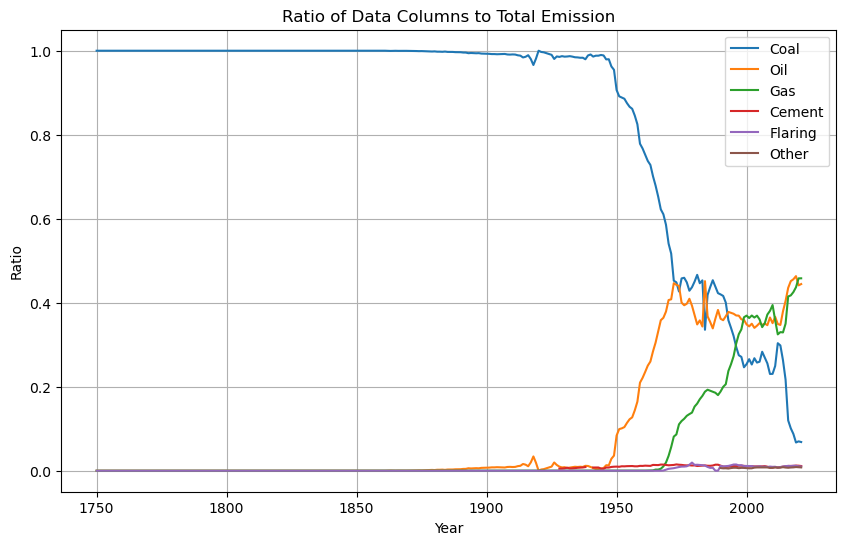

In [5]:
df_ratios = uk_data[columns_of_interest].drop('Year', axis=1)
df_ratios = df_ratios.drop('Total', axis=1).div(uk_data['Total'], axis=0)

# Set the 'Year' column as the index
df_ratios.set_index(uk_data['Year'], inplace=True)

# Plot the ratios
df_ratios.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of Data Columns to Total Emission')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [6]:
ukrn_df.set_index(ukrn_df['Year'], inplace=True)
print(ukrn_df)

      Year  Energy from renewable & waste sources  \
Year                                                
1990  1990                                  1.647   
1991  1991                                  1.634   
1992  1992                                  1.843   
1993  1993                                  1.862   
1994  1994                                  2.528   
1995  1995                                  2.644   
1996  1996                                  2.581   
1997  1997                                  2.611   
1998  1998                                  3.013   
1999  1999                                  3.148   
2000  2000                                  3.164   
2001  2001                                  3.270   
2002  2002                                  3.575   
2003  2003                                  3.802   
2004  2004                                  4.407   
2005  2005                                  5.026   
2006  2006                                  5.

In [7]:
# Make names more friendly
columns = {'Energy from renewable & waste sources':'Total Renewable',
 'Total energy consumption of primary fuels and equivalents': 'Total Fuels',
'Fraction from renewable sources and waste': 'Fraction Renewable',
'Hydroelectric power' : 'Hydro',
'Wind, wave, tidal': 'Wind',
 'Solar photovoltaic': 'Solar',
 'Geothermal aquifers': 'Geo',
'Landfill gas': 'Landfill',
'Sewage gas' : 'Sewage',
 'Biogas from autogen': 'Biogas',
'Municipal solid waste (MSW)' : 'Solid Waste'}

ukrn_df.rename(columns=columns, inplace=True)

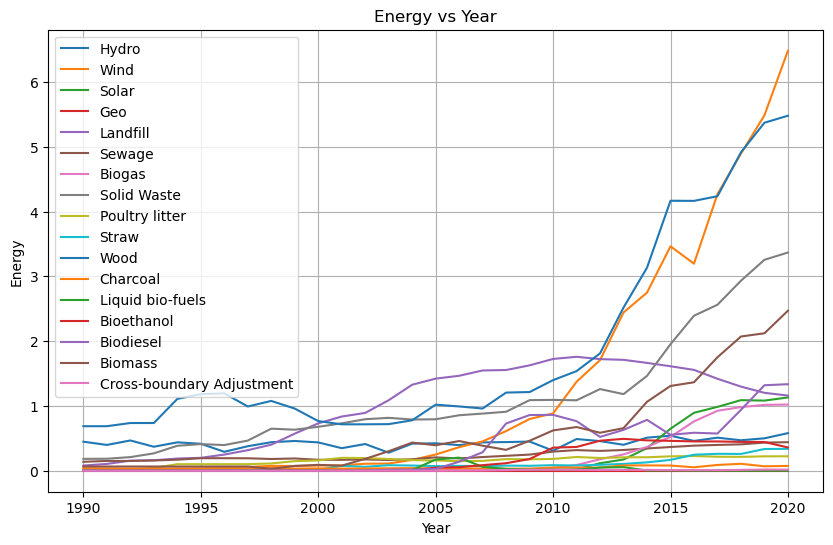

In [8]:
# Plot the data
ukrn_df.drop(["Year", "Total Renewable", "Total Fuels", "Fraction Renewable"], axis=1).plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Energy')
plt.title('Energy vs Year')
plt.grid(True)
plt.show()

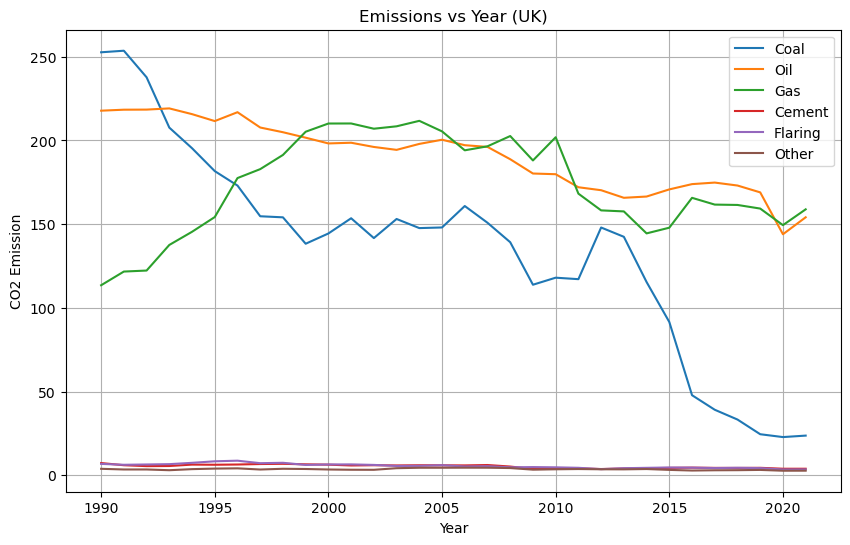

In [10]:
# Filter the DataFrame for values after 1990
recent_data = uk_data[uk_data['Year'] >= 1990]

# Calculate the ratios
columns_of_interest = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
recent_ratios = recent_data[columns_of_interest]

# Set the 'Year' column as the index
recent_ratios.set_index(recent_data['Year'], inplace=True)

# Plot the ratios
recent_ratios.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.title('Emissions vs Year (UK)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [11]:
# Concatenate the DataFrames horizontally
renevables = ukrn_df.drop(["Cross-boundary Adjustment","Year"], axis=1)
emissions = recent_data.drop(["Country","ISO 3166-1 alpha-3","Year"], axis=1)
emissions.set_index(recent_data['Year'], inplace=True)
# print(emissions)
concatenated_df = pd.concat([renevables, emissions], axis=1)
concatenated_df.fillna(0)
print(concatenated_df.corr())

                    Total Renewable  Total Fuels  Fraction Renewable  \
Total Renewable            1.000000    -0.893684            0.995173   
Total Fuels               -0.893684     1.000000           -0.907825   
Fraction Renewable         0.995173    -0.907825            1.000000   
Hydro                      0.633815    -0.699433            0.648524   
Wind                       0.989714    -0.917302            0.995903   
Solar                      0.947400    -0.851567            0.953799   
Geo                             NaN          NaN                 NaN   
Landfill                   0.567383    -0.370879            0.510846   
Sewage                     0.973005    -0.894274            0.958531   
Biogas                     0.961551    -0.870477            0.966242   
Solid Waste                0.984709    -0.830630            0.982088   
Poultry litter             0.696343    -0.421167            0.658821   
Straw                      0.969136    -0.815415            0.96

In [12]:
valid_data = concatenated_df[concatenated_df.index < 2021]
print(valid_data.columns)

# Rename columns using a dictionary
columns = {'Energy from renewable & waste sources':'Total Renewable',
 'Total energy consumption of primary fuels and equivalents': 'Total Fuels',
'Fraction from renewable sources and waste': 'Fraction Renewable', 
'Hydroelectric power' : 'Hydro',
'Wind, wave, tidal': 'Wind', 
 'Solar photovoltaic': 'Solar', 
 'Geothermal aquifers': 'Geo',
'Landfill gas': 'Landfill', 
'Sewage gas' : 'Sewage', 
 'Biogas from autogen': 'Biogas',
'Municipal solid waste (MSW)' : 'Solid Waste'}

valid_data.rename(columns=columns, inplace=True)

Index(['Total Renewable', 'Total Fuels', 'Fraction Renewable', 'Hydro', 'Wind',
       'Solar', 'Geo', 'Landfill', 'Sewage', 'Biogas', 'Solid Waste',
       'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels',
       'Bioethanol', 'Biodiesel', 'Biomass', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')


/var/folders/sn/n7_g230x2496nl1tqj_s7wmc0000gn/T/ipykernel_20116/2362011817.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data.rename(columns=columns, inplace=True)


In [13]:
valid_data = valid_data.drop("Geo",axis=1)
print(valid_data.corr())

                    Total Renewable  Total Fuels  Fraction Renewable  \
Total Renewable            1.000000    -0.893684            0.995173   
Total Fuels               -0.893684     1.000000           -0.907825   
Fraction Renewable         0.995173    -0.907825            1.000000   
Hydro                      0.633815    -0.699433            0.648524   
Wind                       0.989714    -0.917302            0.995903   
Solar                      0.947400    -0.851567            0.953799   
Landfill                   0.567383    -0.370879            0.510846   
Sewage                     0.973005    -0.894274            0.958531   
Biogas                     0.961551    -0.870477            0.966242   
Solid Waste                0.984709    -0.830630            0.982088   
Poultry litter             0.696343    -0.421167            0.658821   
Straw                      0.969136    -0.815415            0.967283   
Wood                       0.978572    -0.898920            0.97